In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import scipy.stats as sp
import mat73
import seaborn as sns
from scipy.special import factorial
from scipy.special import logsumexp
import pandas as pd
from replay_structure.utils import get_marginal_sum, get_p_models

from scipy import stats

In [2]:
%load_ext autoreload
%autoreload 2

In [66]:
%matplotlib widget

In [100]:
import replay_structure.structure_models as models
import replay_structure.utils as utils
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
import replay_structure.metadata as meta


from replay_structure.metadata import (
    Likelihood_Function,
    Model,
    Diffusion,
    Momentum,
    Stationary,
    Stationary_Gaussian,
    Random,
    Data_Type,
    string_to_data_type,
    string_to_model,
    Session_Indicator,
    string_to_session_indicator,
    string_to_likelihood_function,
)

## load structure data

In [4]:
bin_size_cm=5
#time_window_ms=3
time_window_ms=15

In [5]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
filename_fulldata = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_fulldata_'+str(bin_size_cm)+'cm_200ms_poisson.obj'
filename_run_raw = RESULTS_PATH+'/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'
filename_fullrun = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_fullrun_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

In [6]:
with open(filename, "rb") as file_object:
    raw_data = file_object.read()
    structure_data = pickle.loads(raw_data)

In [7]:
with open(filename_fulldata, "rb") as file_object:
    raw_data = file_object.read()
    structure_data_full = pickle.loads(raw_data)

In [8]:
with open(filename_run_raw, "rb") as file_object:
    raw_data = file_object.read()
    data_run_raw = pickle.loads(raw_data)

In [9]:
with open(filename_fullrun, "rb") as file_object:
    raw_data = file_object.read()
    structure_data_run = pickle.loads(raw_data)

In [10]:
structure_data.params.likelihood_function_params.rate_scaling

2.5

# Dynamic Models

In [60]:
model_results = models.Random(structure_data).get_model_evidences()

In [61]:
model_results = models.Random(structure_data).get_model_evidences()

In [62]:
model_results_stat = models.Stationary(structure_data).get_model_evidences()
#model_results_stat

In [63]:
model_results_gaus = models.Stationary_Gaussian(structure_data, 0.1).get_model_evidences()
#print(np.nansum(abs(ori-model_results_gaus)))
#model_results_gaus

In [64]:
model_results_diff = models.Diffusion(structure_data, 0.85).get_model_evidences()
#print(np.nansum(abs(ori-model_results_diff)))
#model_results_diff

In [65]:
model_results_mom = models.Momentum(structure_data, 0.03, 90, 80).get_model_evidences()
#print(np.nansum(abs(ori-model_results_mom)))
#ori-model_results_mom

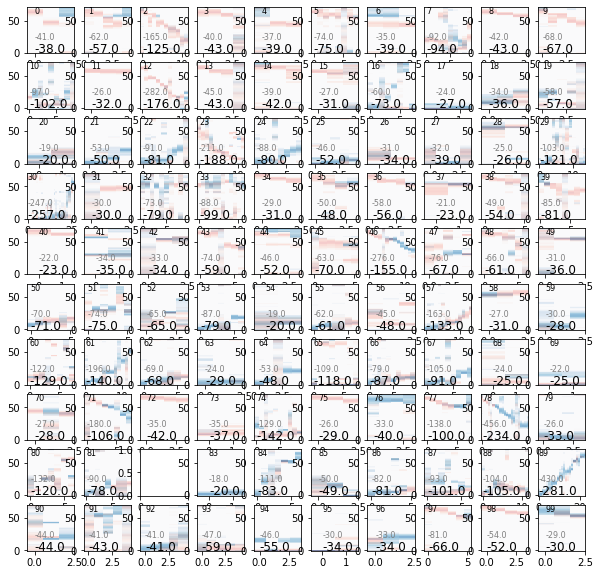

In [66]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(100):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        pos = marginal_plot[:71,:]
        neg = marginal_plot[71:,:]
        ax.flatten()[spikemat_ind].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        ax.flatten()[spikemat_ind].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        #ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind].round()), fontsize=12, color='k')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind), fontsize=8, color='k')

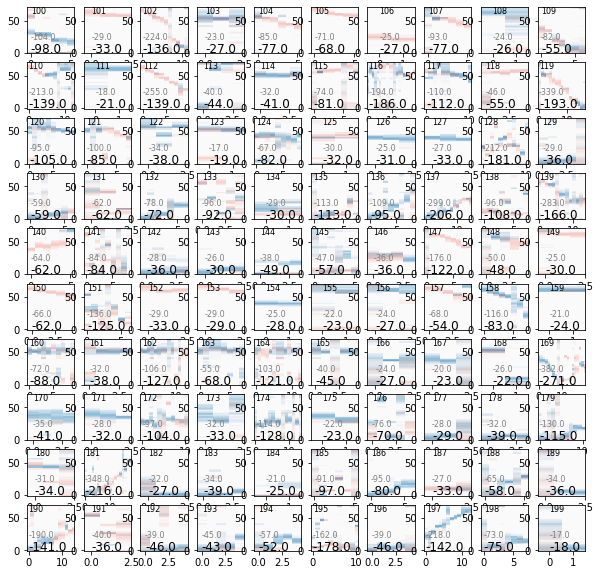

In [67]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(100):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind+100)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        pos = marginal_plot[:71,:]
        neg = marginal_plot[71:,:]
        ax.flatten()[spikemat_ind].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        ax.flatten()[spikemat_ind].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        #ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind+100].round()), fontsize=12, color='k')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind+100].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind+100), fontsize=8, color='k')

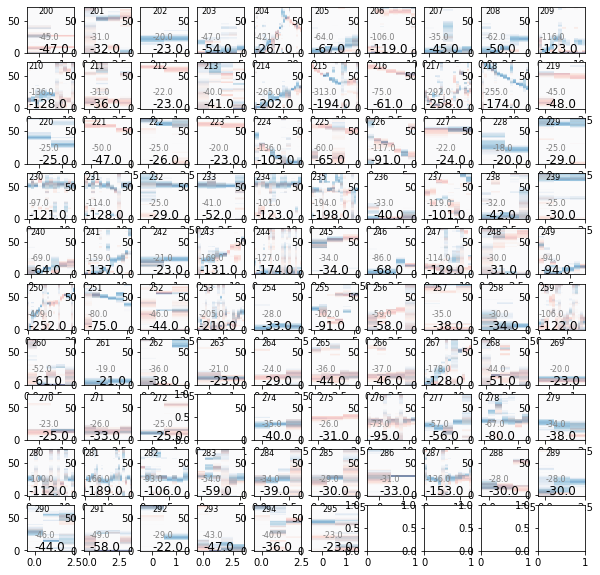

In [68]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(96):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind+200)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        pos = marginal_plot[:71,:]
        neg = marginal_plot[71:,:]
        ax.flatten()[spikemat_ind].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        ax.flatten()[spikemat_ind].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
        #ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind+200].round()), fontsize=12, color='k')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind+200].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind+200), fontsize=8, color='k')

In [300]:
mc_results.results_dataframe.iloc[231]

diffusion                         -115.109
momentum                          -115.116
stationary                        -113.766
stationary_gaussian               -111.756
random                            -127.924
mll_model              stationary_gaussian
mll_model_ori                    diffusion
class                                    0
class_ori                                1
Name: 231, dtype: object

# Grid Seach

In [69]:
import replay_structure.structure_models_gridsearch as gridsearch
from replay_structure.config import (
    Structure_Model_Gridsearch_Parameters)
from replay_structure.model_comparison import (
    Gridsearch_Marginalization,
    Model_Comparison,
)

In [70]:
params = Structure_Model_Gridsearch_Parameters.ripple_stationary_gaussian_params()
# sd_array_meters=np.logspace(-2, 0.3, 30).round(2)
sg_gridsearch = gridsearch.Stationary_Gaussian(structure_data, params)

sd = 0.01
sd = 0.01
sd = 0.01
sd = 0.02
sd = 0.02
sd = 0.02
sd = 0.03
sd = 0.04
sd = 0.04
sd = 0.05
sd = 0.06
sd = 0.07
sd = 0.09
sd = 0.11
sd = 0.13
sd = 0.15
sd = 0.19
sd = 0.22
sd = 0.27
sd = 0.32
sd = 0.39
sd = 0.46
sd = 0.56
sd = 0.67
sd = 0.8
sd = 0.96
sd = 1.1
sd = 1.4
sd = 1.7
sd = 2.0


In [71]:
params = Structure_Model_Gridsearch_Parameters.ripple_diffusion_params()
# sd_array_meters=np.logspace(-1, 0.8, 30).round(2)
diffusion_gridsearch = gridsearch.Diffusion(structure_data, params)

sd = 0.1
[ -41.88922454  -55.78005848 -166.06109767  -41.62415794  -38.24865685]
sd = 0.12
[ -41.88745064  -55.77646862 -166.08521655  -41.61170348  -38.24798709]
sd = 0.13
[ -41.88487742  -55.77119288 -166.11967055  -41.59397924  -38.24702138]
sd = 0.15
[ -41.87449275  -55.74913208 -166.25210829  -41.52627018  -38.24319357]
sd = 0.18
[ -41.84699041  -55.68580911 -166.53562699  -41.37154232  -38.23358902]
sd = 0.2
[ -41.82487152  -55.63132762 -166.55571918  -41.26737663  -38.22646373]
sd = 0.24
[ -41.78026717  -55.5189048  -164.52201369  -41.09773604  -38.21425021]
sd = 0.27
[ -41.74655106  -55.43787581 -162.27407103  -40.99650056  -38.20741111]
sd = 0.31
[ -41.69841096  -55.33332471 -159.60141365  -40.87867951  -38.20076185]
sd = 0.36
[ -41.63280741  -55.21123959 -156.71954439  -40.74891656  -38.19551145]
sd = 0.42
[ -41.55118332  -55.08741926 -153.29515612  -40.61426593  -38.19301148]
sd = 0.48
[ -41.4732643   -54.99281586 -149.74960409  -40.49693068  -38.19428086]
sd = 0.56
[ -41.38

In [20]:
np.logspace(-1, 0.8, 30).round(2)

array([0.1 , 0.12, 0.13, 0.15, 0.18, 0.2 , 0.24, 0.27, 0.31, 0.36, 0.42,
       0.48, 0.56, 0.64, 0.74, 0.85, 0.98, 1.14, 1.31, 1.51, 1.74, 2.01,
       2.32, 2.68, 3.09, 3.56, 4.11, 4.74, 5.47, 6.31])

In [ ]:
list(structure_data.spikemats.keys())

In [191]:
params = Structure_Model_Gridsearch_Parameters.ripple_momentum_params()
# sd_array_meters=np.logspace(1.6, 2.6, 30).round(2)
# decay_array=np.array([1, 25, 50, 75, 100, 200, 300, 400, 500, 800])
# initial_sd_m_per_s=10

momentum_gridsearch_all= []

In [192]:
len(list(structure_data.spikemats.keys()))

296

In [206]:
adjust_params = False
for spikemat_ind in list(structure_data.spikemats.keys())[200:296]:
    print(spikemat_ind)
    momentum_gridsearch = gridsearch.Momentum(
            structure_data, params, spikemat_ind, adjust_params=adjust_params
        )
    momentum_gridsearch_all.append(momentum_gridsearch)

200
sd = 4e+01
sd = 4.3e+01
sd = 4.7e+01
sd = 5.1e+01
sd = 5.5e+01
sd = 5.9e+01
sd = 6.4e+01
sd = 6.9e+01
sd = 7.5e+01
sd = 8.1e+01
sd = 8.8e+01
sd = 9.5e+01
sd = 1e+02
sd = 1.1e+02
sd = 1.2e+02
sd = 1.3e+02
sd = 1.4e+02
sd = 1.5e+02
sd = 1.7e+02
sd = 1.8e+02
sd = 1.9e+02
sd = 2.1e+02
sd = 2.3e+02
sd = 2.5e+02
sd = 2.7e+02
sd = 2.9e+02
sd = 3.1e+02
sd = 3.4e+02
sd = 3.7e+02
sd = 4e+02
201
sd = 4e+01
sd = 4.3e+01
sd = 4.7e+01
sd = 5.1e+01
sd = 5.5e+01
sd = 5.9e+01
sd = 6.4e+01
sd = 6.9e+01
sd = 7.5e+01
sd = 8.1e+01
sd = 8.8e+01
sd = 9.5e+01
sd = 1e+02
sd = 1.1e+02
sd = 1.2e+02
sd = 1.3e+02
sd = 1.4e+02
sd = 1.5e+02
sd = 1.7e+02
sd = 1.8e+02
sd = 1.9e+02
sd = 2.1e+02
sd = 2.3e+02
sd = 2.5e+02
sd = 2.7e+02
sd = 2.9e+02
sd = 3.1e+02
sd = 3.4e+02
sd = 3.7e+02
sd = 4e+02
202
sd = 4e+01
sd = 4.3e+01
sd = 4.7e+01
sd = 5.1e+01
sd = 5.5e+01
sd = 5.9e+01
sd = 6.4e+01
sd = 6.9e+01
sd = 7.5e+01
sd = 8.1e+01
sd = 8.8e+01
sd = 9.5e+01
sd = 1e+02
sd = 1.1e+02
sd = 1.2e+02
sd = 1.3e+02
sd = 1.4e+02
sd 

In [207]:
len(momentum_gridsearch_all)

296

In [208]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/mom_gridsearch'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(momentum_gridsearch_all)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [83]:
momentum_gridsearch_all = pd.read_pickle(RESULTS_PATH+"/mom_gridsearch_RD5cm_200ms_poisson.obj")

## Model comparison

In [84]:
sg_marginalized_gridsearch = Gridsearch_Marginalization(sg_gridsearch)
#sg_marginalized_gridsearch.marginalized_model_evidences
#sg_marginalized_gridsearch.marginalization_info['best_fit_gridsearch_params']['sd_meters']

294
(296, 30) (30,)


/home/katharina/Documents/Studium/MIT/project/1D/replay_structure/model_comparison.py:67: RuntimeWarning: All-NaN slice encountered
  argmax_mat = gridsearch_results.T == np.nanmax(gridsearch_results, axis=1)
/home/katharina/anaconda3/envs/mitproject/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [78]:
dif_marginalized_gridsearch = Gridsearch_Marginalization(diffusion_gridsearch)

294
(296, 30) (30,)


In [79]:
dif_sd_meters = dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]["sd_meters"]

In [80]:
# mode from diffusion gridsearch on all sessions
MAX_LIKELIHOOD_SD_METERS_RIPPLES = stats.mode(dif_sd_meters)
MAX_LIKELIHOOD_SD_METERS_RIPPLES

ModeResult(mode=array([0.1]), count=array([86]))

In [85]:
#aggregate_momentum_gridsearch
n_spikemats = len(structure_data.spikemats)
momentum_gridsearch_0 = momentum_gridsearch_all[0]
n_sd = len(momentum_gridsearch_0.gridsearch_params["sd_array_meters"])
n_decay = len(momentum_gridsearch_0.gridsearch_params["decay_array"])
gridsearch_results = np.full((n_spikemats, n_sd, n_decay), np.nan)
to_run_on_o2_medium = np.array([])
for ripple in range(n_spikemats):
    gridsearch_results[ripple] = momentum_gridsearch_all[ripple].gridsearch_results
momentum_gridsearch_aggregated = momentum_gridsearch_0
momentum_gridsearch_aggregated.gridsearch_results = gridsearch_results

In [86]:
mom_marginalized_gridsearch = Gridsearch_Marginalization(momentum_gridsearch_aggregated)

294


/home/katharina/Documents/Studium/MIT/project/1D/replay_structure/model_comparison.py:77: RuntimeWarning: All-NaN slice encountered
  argmax_mat = gridsearch_results.T == np.nanmax(


In [87]:
mom_marginalized_gridsearch.gridsearch_params

{'sd_array_meters': array([ 39.81,  43.1 ,  46.66,  50.52,  54.69,  59.21,  64.11,  69.4 ,
         75.14,  81.35,  88.07,  95.35, 103.23, 111.76, 120.99, 130.99,
        141.82, 153.53, 166.22, 179.96, 194.83, 210.93, 228.36, 247.23,
        267.66, 289.78, 313.73, 339.65, 367.72, 398.11]),
 'decay_array': array([  1,  25,  50,  75, 100, 200, 300, 400, 500, 800]),
 'initial_sd_m_per_s': 10,
 'sd_0_meters': 0.15}

In [88]:
model_evidences = dict()
model_evidences["random"] = model_results
model_evidences["stationary"] = model_results_stat
model_evidences["stationary_gaussian"] = sg_marginalized_gridsearch.marginalized_model_evidences
model_evidences["diffusion"] = dif_marginalized_gridsearch.marginalized_model_evidences
model_evidences["momentum"] = mom_marginalized_gridsearch.marginalized_model_evidences

In [89]:
random_effects_prior = 10

In [90]:
pd.set_option('display.max_rows', None)

In [93]:
mc_results = Model_Comparison(
    model_evidences, random_effects_prior=random_effects_prior
)

    diffusion    momentum  stationary  stationary_gaussian      random  \
0  -40.695563  -41.982176  -41.173355           -40.843349  -37.905061   
1  -54.739269  -54.798209  -62.105952           -58.297066  -57.226369   
2 -117.845978 -116.213492 -165.131104          -122.554960 -125.210363   
3  -40.271459  -39.304909  -39.836276           -38.937174  -43.006701   
4  -38.313928  -38.473137  -37.070822           -37.212123  -39.073052   

             mll_model  
0               random  
1            diffusion  
2             momentum  
3  stationary_gaussian  
4           stationary  
stationary             105
momentum                89
stationary_gaussian     57
diffusion               26
random                  17
Name: mll_model, dtype: int64
294
[0.09239373 0.41624536 0.20147951 0.2231555  0.0667259 ]


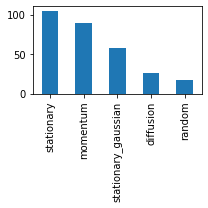

In [94]:
plt.figure(figsize=(3,3))
mc_results.results_dataframe.mll_model.value_counts().plot(kind='bar')
plt.tight_layout()

### comparison

In [329]:
mc_results_ori = pd.read_pickle("mc_results.pkl")

In [331]:
p_rip_model_ori = []
for i in range(294):
    p_rip_model_ori.append(get_p_models(mc_results_ori[meta.MODELS_AS_STR].iloc[i].values))

In [122]:
mc_results.results_dataframe['mll_model_ori'] = mc_results_ori['mll_model']

In [123]:
mc_results.results_dataframe['class'] = mc_results.results_dataframe["mll_model"].isin(['diffusion', 'momentum']) #False = Control; True = Patient
mc_results.results_dataframe['class'] = mc_results.results_dataframe['class'].astype(int)
mc_results.results_dataframe['class_ori'] = mc_results.results_dataframe["mll_model_ori"].isin(['diffusion', 'momentum'])
mc_results.results_dataframe['class_ori'] = mc_results.results_dataframe['class_ori'].astype(int)

In [162]:
mc_results.results_dataframe

,diffusion,momentum,stationary,stationary_gaussian,random,mll_model,mll_model_ori,class,class_ori
0,-40.695563,-41.982176,-41.173355,-40.843349,-37.905061,random,stationary_gaussian,0,0
1,-54.739269,-54.798209,-62.105952,-58.297066,-57.226369,diffusion,stationary,1,0
2,-117.845978,-116.213492,-165.131104,-122.554960,-125.210363,momentum,diffusion,1,1
3,-40.271459,-39.304909,-39.836276,-38.937174,-43.006701,stationary_gaussian,momentum,0,1
4,-38.313928,-38.473137,-37.070822,-37.212123,-39.073052,stationary,stationary,0,0
5,-67.964163,-67.506076,-73.538556,-66.482232,-75.433182,stationary_gaussian,diffusion,0,1
6,-37.336882,-37.211466,-35.482227,-36.072556,-38.941968,stationary,stationary,0,0
7,-84.551344,-84.688514,-91.866581,-88.544469,-94.089495,diffusion,stationary,1,0
8,-39.732630,-39.940743,-41.573606,-38.852643,-42.715252,stationary_gaussian,momentum,0,1
9,-65.893914,-66.704462,-68.108654,-64.793612,-67.281047,stationary_gaussian,diffusion,0,1


In [323]:
mc_results.random_effects_results

{'gibbs': array([[0.26992406, 0.18209054, 0.27755162, 0.11517388, 0.1552599 ],
        [0.23706679, 0.28951912, 0.25862452, 0.11314464, 0.10164492],
        [0.20147516, 0.30198476, 0.24892567, 0.18568547, 0.06192895],
        ...,
        [0.0842645 , 0.40272873, 0.25758035, 0.19277062, 0.06265579],
        [0.06485727, 0.40957568, 0.3373554 , 0.14082516, 0.04738649],
        [0.06743896, 0.38362712, 0.33612514, 0.13275866, 0.08005012]]),
 'alpha_m': array([[ 81.,  94.,  95.,  45.,  29.],
        [ 67., 114.,  88.,  51.,  24.],
        [ 67., 119.,  81.,  54.,  23.],
        ...,
        [ 29., 131.,  96.,  64.,  24.],
        [ 30., 136., 102.,  51.,  25.],
        [ 33., 143.,  94.,  52.,  22.]]),
 'p_models': array([0.09239373, 0.41624536, 0.20147951, 0.2231555 , 0.0667259 ]),
 'p_exceedance': array([0., 1., 0., 0., 0.])}

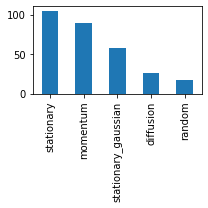

In [106]:
plt.figure(figsize=(3,3))
mc_results.results_dataframe.mll_model.value_counts().plot(kind='bar')
plt.tight_layout()

In [138]:
comparison_traj = np.array(mc_results.results_dataframe[['class_ori']].values).squeeze() ==np.array(mc_results.results_dataframe[['class']].values).squeeze()

In [140]:
comparison_traj.sum()

203

In [165]:
change = np.array(mc_results.results_dataframe[['class_ori']].values).squeeze() - np.array(mc_results.results_dataframe[['class']].values).squeeze()

In [172]:
np.where(change==0)[0].shape

(203,)

In [311]:
mc_results_pfadd.results_dataframe['mll_model_ori'] = mc_results_ori['mll_model']

In [312]:
mc_results_pfadd.results_dataframe['class'] = mc_results_pfadd.results_dataframe["mll_model"].isin(['diffusion', 'momentum']) #False = Control; True = Patient
mc_results_pfadd.results_dataframe['class'] = mc_results_pfadd.results_dataframe['class'].astype(int)
mc_results_pfadd.results_dataframe['class_ori'] = mc_results_pfadd.results_dataframe["mll_model_ori"].isin(['diffusion', 'momentum'])
mc_results_pfadd.results_dataframe['class_ori'] = mc_results_pfadd.results_dataframe['class_ori'].astype(int)

In [313]:
mc_results_pfadd.results_dataframe

,diffusion,momentum,stationary,stationary_gaussian,random,mll_model,mll_model_ori,class,class_ori
0,-41.533058,-42.359289,-42.101976,-41.330067,-42.098970,stationary_gaussian,stationary_gaussian,0,0
1,-57.862826,-57.961681,-57.816411,-58.109782,-61.374645,stationary,stationary,0,0
2,-125.858438,-123.972077,-168.013179,-137.416376,-134.446492,momentum,diffusion,1,1
3,-44.246368,-43.494816,-45.260579,-44.702489,-47.844349,momentum,momentum,1,1
4,-41.884797,-41.940838,-41.759722,-41.952300,-42.904446,stationary,stationary,0,0
5,-72.414731,-72.242874,-78.536630,-74.002407,-80.373543,momentum,diffusion,1,1
6,-40.342780,-40.238805,-39.985242,-40.495041,-42.538282,stationary,stationary,0,0
7,-88.829301,-89.129669,-88.213526,-88.967967,-97.606326,stationary,stationary,0,0
8,-47.831367,-48.080398,-50.735410,-48.252878,-50.775866,diffusion,momentum,1,1
9,-68.844915,-69.132325,-73.786441,-70.394190,-71.338618,diffusion,diffusion,1,1


In [327]:
import replay_structure.metadata as meta

In [334]:
p_rip_model_pfadd = []
for i in range(294):
    p_rip_model_pfadd.append(get_p_models(mc_results_pfadd.results_dataframe[meta.MODELS_AS_STR].iloc[i].values))

In [367]:
mc_results_pfadd.results_dataframe[meta.MODELS_AS_STR].iloc[0]

diffusion             -41.533058
momentum              -42.359289
stationary            -42.101976
stationary_gaussian   -41.330067
random                -42.098970
Name: 0, dtype: float64

In [363]:
from collections import Counter

In [ ]:
model_names = ["Diffusion", "Momentum", "Stationary", "Gaussian", "Random"]

In [364]:
model_ori = np.argmax(np.array(p_rip_model_ori), axis=1)
model_pfadd = np.argmax(np.array(p_rip_model_pfadd), axis=1)

Counter([str(tu) for tu in np.vstack((model_ori, model_pfadd)).T])

Counter({'[3 3]': 12,
         '[2 2]': 92,
         '[0 1]': 32,
         '[1 1]': 72,
         '[1 0]': 7,
         '[0 0]': 24,
         '[1 2]': 28,
         '[4 1]': 1,
         '[1 3]': 2,
         '[4 4]': 17,
         '[0 2]': 1,
         '[2 3]': 1,
         '[2 1]': 4,
         '[2 0]': 1})

In [322]:
mc_results_pfadd.random_effects_results

{'gibbs': array([[0.26992406, 0.18209054, 0.27755162, 0.11517388, 0.1552599 ],
        [0.30166132, 0.28873335, 0.22297637, 0.10900549, 0.07762346],
        [0.29788263, 0.35784528, 0.19109956, 0.08212866, 0.07104387],
        ...,
        [0.21748759, 0.54335052, 0.11028539, 0.05747467, 0.07140182],
        [0.20615701, 0.50493981, 0.17446824, 0.0596889 , 0.05474604],
        [0.14187736, 0.56101571, 0.15514346, 0.06054035, 0.08142313]]),
 'alpha_m': array([[ 99., 109.,  77.,  31.,  28.],
        [101., 124.,  66.,  28.,  25.],
        [112., 140.,  43.,  23.,  26.],
        ...,
        [ 59., 188.,  50.,  22.,  25.],
        [ 55., 192.,  52.,  23.,  22.],
        [ 43., 203.,  49.,  25.,  24.]]),
 'p_models': array([0.13063499, 0.59537172, 0.13778449, 0.07002726, 0.06618155]),
 'p_exceedance': array([0., 1., 0., 0., 0.])}

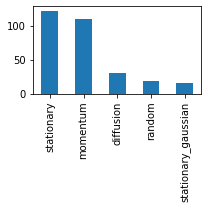

In [314]:
plt.figure(figsize=(3,3))
mc_results_pfadd.results_dataframe.mll_model.value_counts().plot(kind='bar')
plt.tight_layout()

In [315]:
comparison_traj = np.array(mc_results_pfadd.results_dataframe[['class_ori']].values).squeeze() ==np.array(mc_results_pfadd.results_dataframe[['class']].values).squeeze()

In [316]:
comparison_traj.sum()

259

In [317]:
change_pfadd = np.array(mc_results_pfadd.results_dataframe[['class_ori']].values).squeeze() - np.array(mc_results_pfadd.results_dataframe[['class']].values).squeeze()

In [320]:
np.where(change_pfadd==0)[0].shape

(259,)

In [321]:
comparison_traj_pfadd = np.array(mc_results_pfadd.results_dataframe[['class']].values).squeeze() ==np.array(mc_results.results_dataframe[['class']].values).squeeze()
comparison_traj_pfadd.sum()

224

## Gridsearch results

In [95]:
sg_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'stationary_gaussian'].tolist()
sg_sd = sg_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][sg_index]

sd_array_meters_sg = np.logspace(-2, 0.3, 30).round(2)

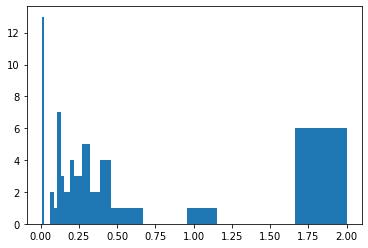

In [96]:
plt.figure()
plt.hist(sg_sd, bins=sd_array_meters_sg)
plt.show()

In [97]:
diff_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'diffusion'].tolist()
diff_sd = dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][diff_index]

array_meters_diff = np.logspace(-1, 0.8, 30).round(2)

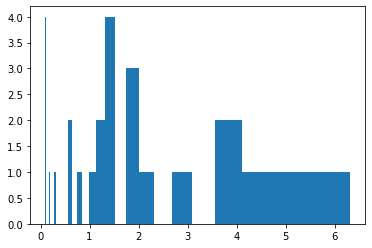

In [98]:
plt.figure()
plt.hist(diff_sd, bins=array_meters_diff)
plt.show()

In [145]:
mom_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'momentum'].tolist()

mom_decay = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['decay'][mom_index]
decay_array=np.array([1, 25, 50, 75, 100, 200, 300, 400, 500, 800])

mom_sd = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][mom_index]
sd_array_meters=np.logspace(1.6, 2.6, 30).round(2)

In [146]:
mom_decay

array([  1,  75, 800,   1,  25,  25,  50,  50,   1,   1,  75,  75,  25,
       200,   1, 100,   1,   1,   1,   1,  50,   1,   1,  25,  25, 400,
         1, 800,  75, 800, 800,  50,   1,  25,   1, 800,  25,  75,  50,
         1, 500, 800,   1,   1,  25,  75,   1,   1,  25, 800, 800,   1,
         1, 400,   1, 800, 800, 800, 400,   1, 100,  25,   1,   1,   1,
         1, 400,  75, 800,  25,  50,   1,   1,  25,   1,   1,  50,   1,
         1, 400,  50,  25,   1, 800, 800, 800, 800, 300, 800])

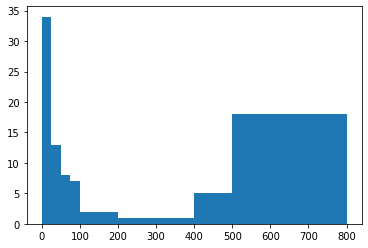

In [147]:
plt.figure()
plt.hist(mom_decay, bins=decay_array)
plt.show()

In [148]:
np.logspace(1.6, 2.3, 30).round(2)

array([ 39.81,  42.09,  44.49,  47.03,  49.72,  52.56,  55.57,  58.74,
        62.1 ,  65.65,  69.4 ,  73.37,  77.56,  82.  ,  86.68,  91.64,
        96.87, 102.41, 108.26, 114.45, 120.99, 127.91, 135.22, 142.95,
       151.12, 159.75, 168.88, 178.54, 188.74, 199.53])

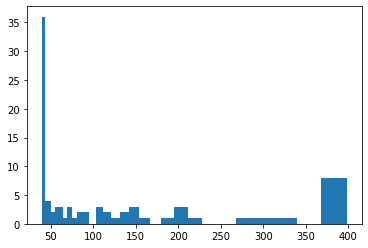

In [149]:
plt.figure()
plt.hist(mom_sd, bins=sd_array_meters)
plt.show()

In [26]:
ripple_selection_ind = [3, 8, 12, 23, 39, 46, 57, 71, 78, 89, 102, 112, 127, 147, 197, 204, 250, 280, 285]

In [151]:
model_evidences['stationary'][spikemat_ind]

-22.568276251722082

In [25]:
fig, ax = plt.subplots(5,len(ripple_selection_ind), figsize=(20,5), sharey=True)
for i, spikemat_ind in enumerate(ripple_selection_ind):
    random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
    if random is not np.nan:
        marginal_plot = get_marginal_sum(random)
        ax[0,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[0,i].text(0, 0, str(model_evidences['random'][spikemat_ind].round()), fontsize=12, color='white')
        ax[0,i].text(0, 60, str(spikemat_ind), fontsize=8, color='white')
    stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
    if stat is not np.nan:
        stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
        marginal_plot = get_marginal_sum(stat.T)
        ax[1,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[1,i].text(0, 0, str(model_evidences['stationary'][spikemat_ind].round()), fontsize=12, color='white')
    gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
    if gaus is not np.nan:
        marginal_plot = get_marginal_sum(gaus)
        ax[2,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[2,i].text(0, 0, str(model_evidences['stationary_gaussian'][spikemat_ind].round()), fontsize=12, color='white')
    diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
    if diffusion is not np.nan:
        marginal_plot = get_marginal_sum(diffusion)
        ax[3,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[3,i].text(0, 0, str(model_evidences['diffusion'][spikemat_ind].round()), fontsize=12, color='white')
    momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
    if momentum is not np.nan:
        marginal_plot = get_marginal_sum(momentum)
        ax[4,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[4,i].text(0, 0, str(model_evidences['momentum'][spikemat_ind].round()), fontsize=12, color='white')
ax[0,0].set_ylabel('random', rotation=0)
ax[1,0].set_ylabel('stationary ', rotation=0)
ax[2,0].set_ylabel('gaus', rotation=0)
ax[3,0].set_ylabel('diffusion ', rotation=0)
ax[4,0].set_ylabel('momentum ', rotation=0)

NameError: name 'ripple_selection_ind' is not defined

In [102]:
p_rip_model = []
for i in range(294):
    p_rip_model.append(get_p_models(mc_results.results_dataframe[meta.MODELS_AS_STR].iloc[i].values))

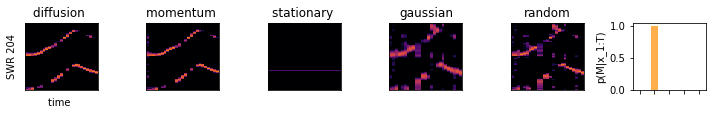

In [103]:
spikemat_ind = 204

fig, ax = plt.subplots(1,6, figsize=(10,1.7), sharey=False)

random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
if random is not np.nan:
    marginal_plot = get_marginal_sum(random)
    ax[4].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
if stat is not np.nan:
    stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
    marginal_plot = get_marginal_sum(stat.T)
    ax[2].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
if gaus is not np.nan:
    marginal_plot = get_marginal_sum(gaus)
    ax[3].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
if diffusion is not np.nan:
    marginal_plot = get_marginal_sum(diffusion)
    ax[0].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
if momentum is not np.nan:
    marginal_plot = get_marginal_sum(momentum)
    ax[1].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')

x_ticks = np.arange(meta.N_MODELS) +.5
ax[5].set_xticks(x_ticks)
ax[5].bar(x_ticks, p_rip_model[spikemat_ind], width=.5, color='darkorange', alpha=.7)
ax[5].set_xticklabels(['', '', '', '', ''])

ax[5].set_ylabel('p(M|x_1:T)')
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[4].set_title('random', rotation=0)
ax[0].set_ylabel('SWR '+str(spikemat_ind))
ax[2].set_title('stationary ', rotation=0)
ax[3].set_title('gaussian', rotation=0)
ax[0].set_title('diffusion ', rotation=0)
ax[0].set_xlabel('time ', rotation=0)
ax[1].set_title('momentum ', rotation=0)

plt.tight_layout()
#plt.savefig('fig/dymo278', dpi=500, transparent=True)

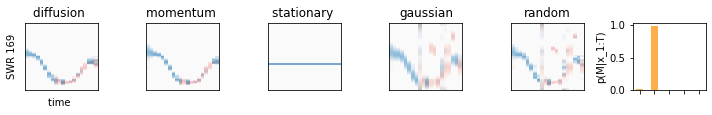

In [106]:
spikemat_ind = 169

fig, ax = plt.subplots(1,6, figsize=(10,1.7), sharey=False)

random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
if random is not np.nan:
    marginal_plot = get_marginal_sum(random)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[4].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[4].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
if stat is not np.nan:
    stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
    marginal_plot = get_marginal_sum(stat.T)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[2].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[2].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
if gaus is not np.nan:
    marginal_plot = get_marginal_sum(gaus)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[3].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[3].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
if diffusion is not np.nan:
    marginal_plot = get_marginal_sum(diffusion)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[0].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[0].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
if momentum is not np.nan:
    marginal_plot = get_marginal_sum(momentum)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[1].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[1].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')

x_ticks = np.arange(meta.N_MODELS) +.5
ax[5].set_xticks(x_ticks)
ax[5].bar(x_ticks, p_rip_model[spikemat_ind], width=.5, color='darkorange', alpha=.7)
ax[5].set_xticklabels(['', '', '', '', ''])

ax[5].set_ylabel('p(M|x_1:T)')
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[4].set_title('random', rotation=0)
ax[0].set_ylabel('SWR '+str(spikemat_ind))
ax[2].set_title('stationary ', rotation=0)
ax[3].set_title('gaussian', rotation=0)
ax[0].set_title('diffusion ', rotation=0)
ax[0].set_xlabel('time ', rotation=0)
ax[1].set_title('momentum ', rotation=0)

plt.tight_layout()
plt.savefig('fig/dymord169', dpi=500, transparent=True)

# run

In [325]:
structure_data_run.spikemats.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [59]:
structure_data_run.pf_matrix.shape[1]

142

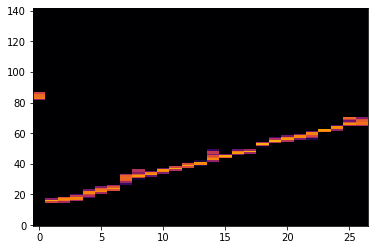

In [63]:
model_results_marginals = models.Diffusion(structure_data_run, 0.85).get_spikemat_marginals(1)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4), interpolation='none')
plt.show()

calculating for running direction
(142, 142)


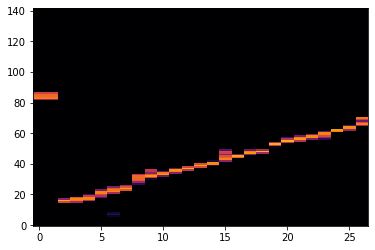

In [64]:
model_results_marginals = models.Momentum(structure_data_run, 1, 90, 80, plotting=True).get_spikemat_marginals(1)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4), interpolation='none')
plt.show()

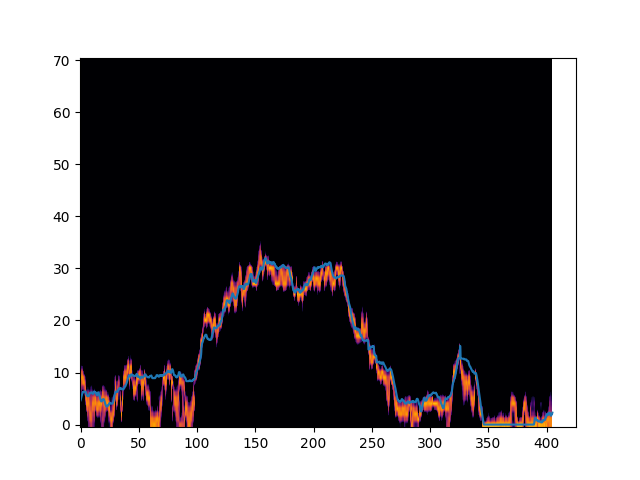

In [333]:
spikemat_ind = 12
model_results_marginals = models.Diffusion(structure_data_run, 0.14).get_spikemat_marginals(spikemat_ind)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
t = np.linspace(0 , model_results_marginals.shape[1], data_run_raw.run_info['true_trajectories_cm'][spikemat_ind].shape[0])
plt.plot(t, data_run_raw.run_info['true_trajectories_cm'][spikemat_ind]/5)
plt.show()

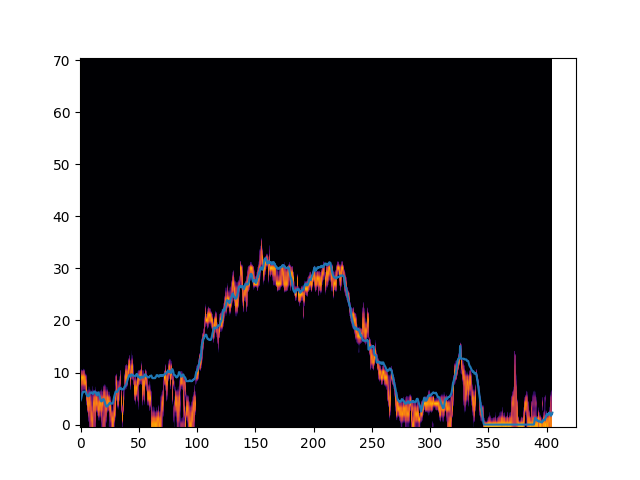

In [336]:
spikemat_ind = 12
model_results_marginals = models.Momentum(structure_data_run, 0.03, 2.4, 20, plotting=True).get_spikemat_marginals(spikemat_ind)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
t = np.linspace(0 , model_results_marginals.shape[1], data_run_raw.run_info['true_trajectories_cm'][spikemat_ind].shape[0])
plt.plot(t, data_run_raw.run_info['true_trajectories_cm'][spikemat_ind]/5)
plt.show()